# Examen parcial 2 (cálculo numérico y algebra lineal)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 09.59am del 30.08.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

# Ejercicio 1

El archivo $\textbf{data_radius_density.csv}$ contiene dos columnas: radio ($ r $) y la densidad ($ \rho (r) $) de un disco plano en función del radio

El disco es lo suficientemente delgado como para que, con fines matemáticos, podamos tratarlo como un objeto bidimensional. Asumimos que la densidad se da en términos de masa por unidad de área (llamada densidad de área), y además asumimos que la densidad varía solo a lo largo del radio del disco (llamada densidad radial). Orientamos el disco en el plano xy, con el centro en el origen. Entonces, la densidad del disco puede ser tratada como una función de x, denotada $\rho(x)$.
<table><tr>
<td> <img src="disk_radius_density.png" width="500" /> </td>
</tr></table>   

* a) importar los datos usando Pandas, graficar la densidad del disco frente a su radio (los gráficos deben tener etiquetas para el eje `x` y el eje `y`).

* b) sabiendo que la masa del disco viene dada por una integral:
$$ m = \int_0^{r} 2 \pi \ r * \rho (r) \ dr $$
     calcular la masa del disco mediante integración numérica  
(*masa total del disco es una suma de masas de anillos con grosura dr)     

In [1]:
!wget https://raw.githubusercontent.com/mhemmg/ComputationalNumericalMethods/master/extras/additional_materials/examen_parcial_II_a/data_radius_density.csv
!wget extras/additional_materials/examen_parcial_II_a/disk_radius_density.png

--2022-09-05 09:46:52--  https://raw.githubusercontent.com/mhemmg/ComputationalNumericalMethods/master/extras/additional_materials/examen_parcial_II_a/data_radius_density.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3702 (3.6K) [text/plain]
Saving to: 'data_radius_density.csv.5'

data_radius_density 100%[===================>]   3.62K  --.-KB/s    in 0s      

2022-09-05 09:46:52 (14.3 MB/s) - 'data_radius_density.csv.5' saved [3702/3702]

--2022-09-05 09:46:52--  http://extras/additional_materials/examen_parcial_II_a/disk_radius_density.png
Resolving extras (extras)... failed: Name or service not known.
wget: unable to resolve host address 'extras'


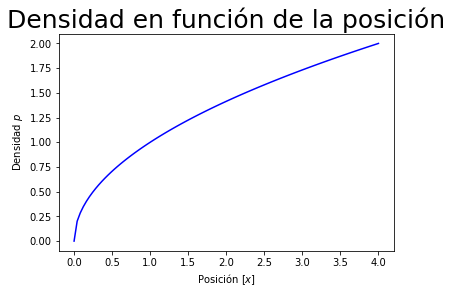

In [2]:
# tu código:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate


#Lectura de datos

df = pd.read_csv ('data_radius_density.csv')

data=df.to_numpy()

density=[];
position=[];

#Llevo a los datos a dos arreglos que se usar mejor

for i in range(0,len(data)):

  density.append(data[i][1]);
  position.append(data[i][0]);

p=np.array(density)
x=np.array(position)



#Procedo a graficar

plt.figure()
plt.rcParams["figure.figsize"] = (10,9)

plt.plot(x,p, 'blue')

plt.xlabel("Posición $[x]$")
plt.ylabel("Densidad $ p $")   #luego colo la letra adecuada
plt.title("Densidad en función de la posición",fontsize=25)
plt.show()


In [3]:
#Y por último procedo a integrar, defino al integrando

def integrando(x,p):
  y=2*np.pi*x*p
  return y

#Y calculo la integral

a=np.min(x)
b=np.max(x)

m,error=integrate.quad(integrando,a,b,1)

print(m)

I_trapz=integrate.trapz(2*np.pi*x*p,x)
I_simps=integrate.simps(2*np.pi*x*p,x)

print("La masa por trapecios es:",I_trapz)
print("La masa según Simpson es:",I_simps)
print("La masa por cuadratura es:",m, "con un error de:", error)


5.026548245743669
La masa por trapecios es: 80.42728369193307
La masa según Simpson es: 80.42489768943993
La masa por cuadratura es: 5.026548245743669 con un error de: 5.580589596813811e-14


# Ejercicio 2

La capacidad calorífica de un gas muy frío se puede aproximar mediante:

$$ C_v \approx \left (\frac{dP}{dT} \right) $$
(en las unidades de $ \left [\frac {J} {K} \right] $)

Donde $P$ es la presión $ [J / s^3] $ del gas y $ T \ [K] $ es la temperatura del gas.

Los datos para la presión frente a la temperatura se dan en el archivo csv ($ \textbf{data_pressure_vs_temperature.csv} $).

* a) importar los datos usando pandas
* b) hacer un gráfico de $P$ vs $T$ (grafico tiene que tener etiquietas)
* c) utilizando la derivada numérica, encuentre la capacidad calorífica.
* d) hacer un gráfico de $C_v$ vs $T$ (grafico tiene que tener etiquietas)
* e) usando el ultimos datos hace una estimacion de Temperatura Critica de este gas (Temperatura Critica es Temperatura de cambio abrupto del comportamiento de Capacidad Termica)

*gas muy frío se refiere a un gas Bose no homogéneo, y la teoría que relaciona $ C_v $ y $ P $ se refiere a la Teoría de Variables Globales Termodinámicas. La presión en realidad se llama parámetro de presión.

In [4]:
!wget https://raw.githubusercontent.com/mhemmg/ComputationalNumericalMethods/master/extras/additional_materials/examen_parcial_II_a/data_pressure_vs_temparature.csv

--2022-09-05 09:46:54--  https://raw.githubusercontent.com/mhemmg/ComputationalNumericalMethods/master/extras/additional_materials/examen_parcial_II_a/data_pressure_vs_temparature.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1412 (1.4K) [text/plain]
Saving to: 'data_pressure_vs_temparature.csv.4'

data_pressure_vs_te 100%[===================>]   1.38K  --.-KB/s    in 0s      

2022-09-05 09:46:54 (10.7 MB/s) - 'data_pressure_vs_temparature.csv.4' saved [1412/1412]



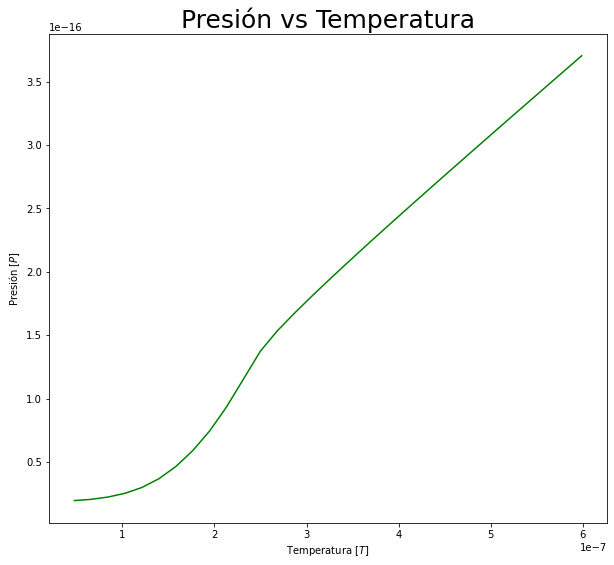

In [5]:
# tu código:

df = pd.read_csv (r'data_pressure_vs_temparature.csv')

data=df.to_numpy()

presion=[];
temperatura=[];

#Llevo a los datos a dos arreglos que se usar mejor

for i in range(0,len(data)):

  presion.append(data[i][1]);
  temperatura.append(data[i][0]);

P=np.array(presion)
T=np.array(temperatura)

#Procedo a graficar

plt.figure()
plt.rcParams["figure.figsize"] = (10,9)

plt.plot(T,P, 'green')

plt.xlabel("Temperatura $[T]$")
plt.ylabel("Presión $[P] $")   #luego colo la letra adecuada
plt.title("Presión vs Temperatura",fontsize=25)
plt.show()



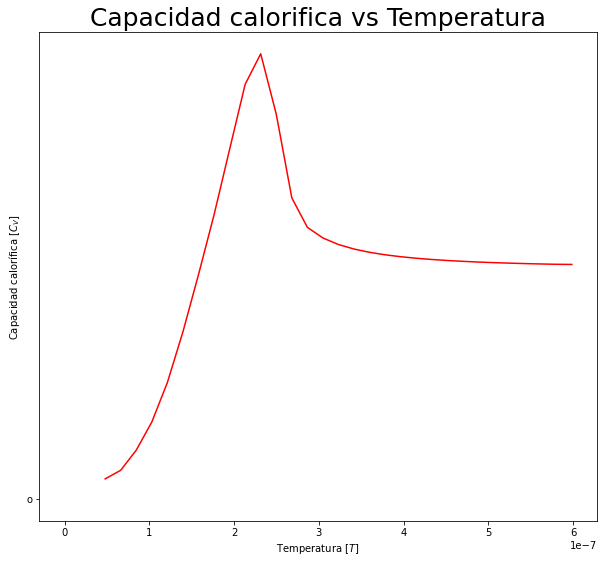

In [6]:
#Ahora procedo a calcular la capacidad calorífica a volumen constante

from scipy import stats

dP_dT=np.gradient(P, T)

plt.figure()
plt.rcParams["figure.figsize"] = (10,9)

plt.plot(T,dP_dT, 'red', "o")

plt.xlabel("Temperatura $[T]$")
plt.ylabel("Capacidad calorífica $[C_{V}] $")   #luego colo la letra adecuada
plt.title("Capacidad calorifica vs Temperatura",fontsize=25)
plt.show()

cv=dP_dT




La temperatura crítica obtenida es: 2.3147805092375502e-07


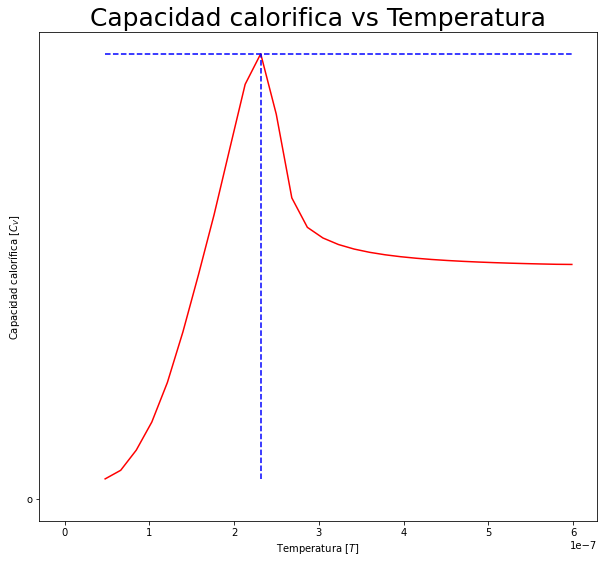

In [7]:
#Por último, calcularé aquella temperatura donde se produce el cambio abrupto de la capacidad calorifica

k=np.argmax(cv)

print("La temperatura crítica obtenida es:", T[k])

plt.figure()
plt.rcParams["figure.figsize"] = (10,9)

plt.plot(T,dP_dT, 'red', "o")

plt.xlabel("Temperatura $[T]$")
plt.ylabel("Capacidad calorífica $[C_{V}] $")   #luego colo la letra adecuada
plt.title("Capacidad calorifica vs Temperatura",fontsize=25)
plt.vlines(T[k], np.amin(cv), np.amax(cv), "blue","--")
plt.hlines(cv[k], np.amin(T), np.amax(T), "blue","--")
plt.show()




# Ejercicio 3

Usando metodo Monte Carlo resuleve el siguiente integral:

$$ \int_{0}^{\pi/2} \int_{0}^{1} e^y \ cos(x) \ dy \ dx $$

In [8]:
# tu codigo


import random as random

a=0
b=0.5*np.pi

c=0
d=1


def f(x,y):
  z=np.exp(y)*np.cos(x)
  return z

#Note usted profe que el área de integración es rectangular, por lo cual puedo usar una distribución uniforme para generar un conjunto aleatorio de entradas

A=(b-a)*(c-d)

n=100000
N=10

results=[]
for i in range(1,N,1):

  S=0
  for i in range(0,n,1):
    S=S+f(np.random.uniform(a,b),np.random.uniform(c,d))

  results.append((1/A)*(S/n))

print("Se usó un método de montecarlo con", n, " puntos y se repitió", N ,"veces")
print("La media de los resultados obtenidos y su respectiva desviación estándar es:")
print(results)
print(np.mean(results), np.std(results))



Se usó un método de montecarlo con 100000  puntos y se repitió 10 veces
La media de los resultados obtenidos y su respectiva desviación estándar es:
[-0.6966757850098296, -0.6970321425979874, -0.6972278464492706, -0.69355135942123, -0.6946946140395441, -0.6979850452125259, -0.694262238159124, -0.6983688669239714, -0.696605657744929]
-0.6962670617287124 0.0015995193247139417


# Ejercicio 4

Resuelve siguiente integral (muestra el error de solucion):

$$ \int_{0}^{10}\frac{x^3}{x^4+16} dx$$

In [9]:
# tu código


def f(x):
  y=(x**3)/(x**4+16)
  return y

a=0
b=10

A=1
I,e=integrate.quad(f,a,b)

print("La integral de la función estimada con cuadratura gaussiana es:", I)
print("y su error es:", e)




La integral de la función estimada con cuadratura gaussiana es: 1.6098375927750248
y su error es: 1.405084939945598e-09


# Feedback:
```
Exercise 1.
Solution + presentation of the results	            (max 2.5p):	2.0p
- resultado de integracion con QUAD no es correcto

Exercise 2.
Solution + presentation of the results	            (max 2.5p):	2.5p

Exercise 3.
Solution + presentation of the results	            (max 2.5p):	1.0p
- resultado corecto es ~1.72

Exercise 4 
Solution + presentation of the results	            (max 2.5p):	2.5p


- Total:                                            (max 10.0p):   8.0p
```